In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])  # Encode labels as integers
y = to_categorical(df['LABEL'])

In [3]:
X = df.drop('LABEL', axis=1).values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

In [6]:
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [7]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3932 - loss: 1.0731 - val_accuracy: 0.5774 - val_loss: 0.9601
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6164 - loss: 0.9226 - val_accuracy: 0.6987 - val_loss: 0.8139
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7653 - loss: 0.7395 - val_accuracy: 0.7155 - val_loss: 0.6987
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8000 - loss: 0.5440 - val_accuracy: 0.6862 - val_loss: 0.6642
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8388 - loss: 0.4372 - val_accuracy: 0.6778 - val_loss: 0.6697
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8570 - loss: 0.3517 - val_accuracy: 0.7238 - val_loss: 0.6805
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.3449 - val_accuracy: 0.6987 - val_loss: 0.7066
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8627 - loss: 0.3021 - val_accuracy: 0.7113 - val_loss

In [8]:
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print("ANN Accuracy:", ann_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.8401 
ANN Accuracy: 0.7591972947120667


In [9]:
cnn_model = Sequential([
    Embedding(input_dim=input_dim, output_dim=128, input_length=input_dim),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [10]:

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4233 - loss: 1.0620 - val_accuracy: 0.6444 - val_loss: 0.7658
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.7560 - loss: 0.6101 - val_accuracy: 0.6946 - val_loss: 0.7729
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8250 - loss: 0.4514 - val_accuracy: 0.6736 - val_loss: 0.8116
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.8557 - loss: 0.3801 - val_accuracy: 0.6904 - val_loss: 0.8880
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.8555 - loss: 0.3553 - val_accuracy: 0.7029 - val_loss: 1.0293
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.8734 - loss: 0.2950 - val_accuracy: 0.6862 - val_loss: 1.1670
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9131 - loss: 0.2144 - val_accuracy: 0.6778 - val_loss: 1.3627
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9280 - loss: 0.1758 - val_accuracy: 0.6

In [11]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Accuracy:", cnn_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7062 - loss: 1.4199
CNN Accuracy: 0.7090300917625427


In [12]:
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [14]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 641ms/step - accuracy: 0.3284 - loss: 1.0982 - val_accuracy: 0.3054 - val_loss: 1.0986
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 667ms/step - accuracy: 0.3664 - loss: 1.0938 - val_accuracy: 0.4435 - val_loss: 1.0878
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 602ms/step - accuracy: 0.4094 - loss: 1.0942 - val_accuracy: 0.3054 - val_loss: 1.1004
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 595ms/step - accuracy: 0.3640 - loss: 1.0798 - val_accuracy: 0.4142 - val_loss: 1.0605
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 632ms/step - accuracy: 0.4363 - loss: 1.0501 - val_accuracy: 0.4686 - val_loss: 1.0360
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.4635 - loss: 1.0190 - val_accuracy: 0.4854 - val_loss: 1.0122
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 665ms/step - accuracy: 0.4848 - loss: 0.9967 - val_accuracy: 0.4937 - val_loss: 1.0016
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 614ms/step - accuracy: 0.4610 - loss: 1.0278 - val_accu

In [15]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print("LSTM Accuracy:", lstm_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.4925 - loss: 1.0204
LSTM Accuracy: 0.5050167441368103


In [16]:
for model, name in zip([ann_model, cnn_model, lstm_model], ['ANN', 'CNN', 'LSTM']):
    if name == 'LSTM':
        y_pred = model.predict(X_test_lstm)
    else:
        y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report for ANN:
              precision    recall  f1-score   support

    football       0.79      0.81      0.80        94
    politics       0.75      0.70      0.72        99
     science       0.74      0.77      0.76       106

    accuracy                           0.76       299
   macro avg       0.76      0.76      0.76       299
weighted avg       0.76      0.76      0.76       299

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Classification Report for CNN:
              precision    recall  f1-score   support

    football       0.81      0.80      0.80        94
    politics       0.71      0.62      0.66        99
     science       0.63      0.72      0.67       106

    accuracy                           0.71       299
   macro avg       0.72      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step

Classification Report for LSTM:
              precisi

In [17]:
print("\nSample Training Data (First 5 rows):")
print(X_train[:5])
print("\nSample Training Labels (First 5 rows):")
print(np.argmax(y_train[:5], axis=1))


Sample Training Data (First 5 rows):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Sample Training Labels (First 5 rows):
[0 0 2 1 0]


In [18]:
def plot_history(history, model_name):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [19]:
def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [20]:
print("\nTraining ANN Model...")
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print("ANN Accuracy:", ann_accuracy)


Training ANN Model...
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9146 - loss: 0.2137 - val_accuracy: 0.6946 - val_loss: 0.8743
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2080 - val_accuracy: 0.6946 - val_loss: 0.9460
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9316 - loss: 0.1761 - val_accuracy: 0.7113 - val_loss: 0.9694
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.1723 - val_accuracy: 0.7071 - val_loss: 1.0250
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9299 - loss: 0.1534 - val_accuracy: 0.7071 - val_loss: 1.0843
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9353 - loss: 0.1391 - val_accuracy: 0.7029 - val_loss: 1.1334
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1410 - val_accuracy: 0.6820 - val_loss: 1.1789
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1267 - val_accu

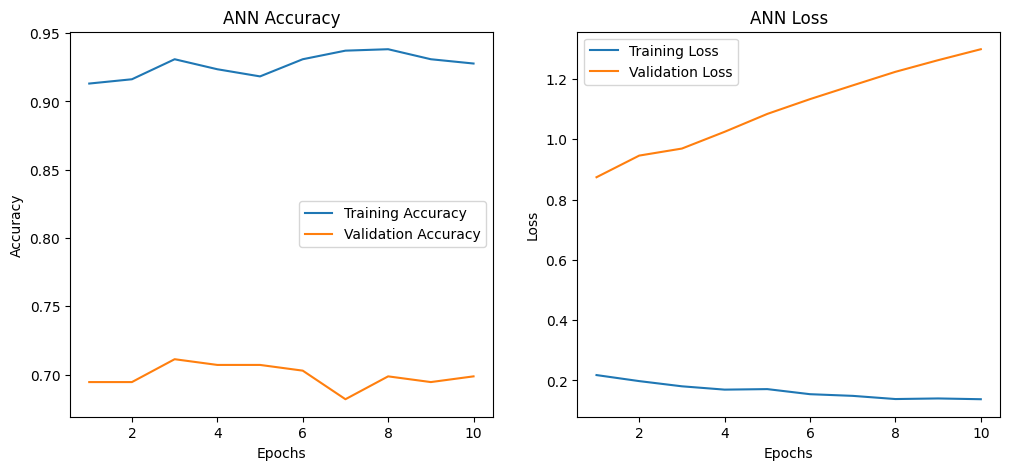

In [21]:
plot_history(ann_history, "ANN")

In [22]:
print("\nTraining CNN Model...")
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Accuracy:", cnn_accuracy)


Training CNN Model...
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9283 - loss: 0.1503 - val_accuracy: 0.6695 - val_loss: 1.9489
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9301 - loss: 0.1398 - val_accuracy: 0.6653 - val_loss: 1.8522
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9400 - loss: 0.1340 - val_accuracy: 0.6904 - val_loss: 2.0496
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9472 - loss: 0.1274 - val_accuracy: 0.6778 - val_loss: 2.1140
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9432 - loss: 0.1296 - val_accuracy: 0.6736 - val_loss: 2.2353
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.9417 - loss: 0.1282 - val_accuracy: 0.6736 - val_loss: 2.2849
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9267 - loss: 0.1410 - val_accuracy: 0.6736 - val_loss: 2.3799
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9372 - loss: 0.

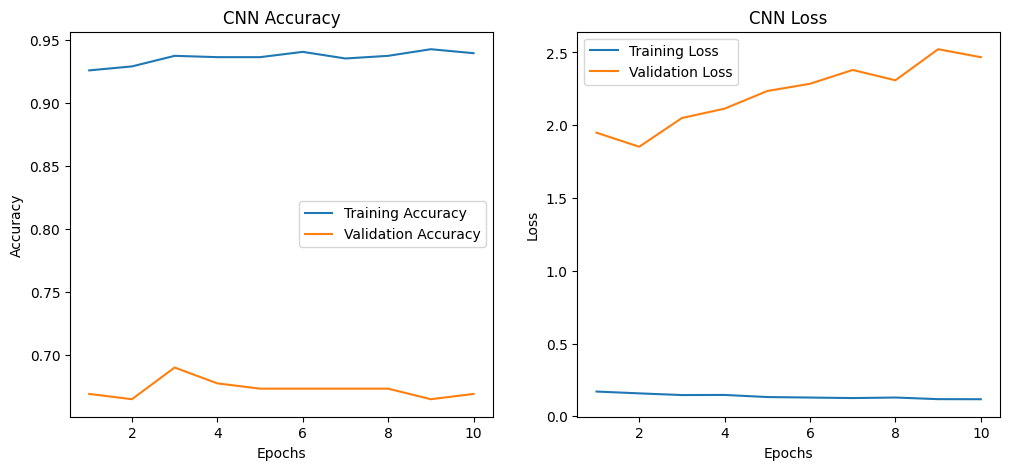

In [23]:
plot_history(cnn_history, "CNN")

In [24]:
print("\nTraining LSTM Model...")
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print("LSTM Accuracy:", lstm_accuracy)


Training LSTM Model...
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 728ms/step - accuracy: 0.4698 - loss: 0.9971 - val_accuracy: 0.5063 - val_loss: 1.0047
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 671ms/step - accuracy: 0.4999 - loss: 0.9947 - val_accuracy: 0.4812 - val_loss: 0.9969
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 633ms/step - accuracy: 0.4641 - loss: 1.0002 - val_accuracy: 0.4351 - val_loss: 1.0008
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 630ms/step - accuracy: 0.4294 - loss: 1.0114 - val_accuracy: 0.5188 - val_loss: 0.9864
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 687ms/step - accuracy: 0.5060 - loss: 0.9801 - val_accuracy: 0.4937 - val_loss: 0.9775
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 629ms/step - accuracy: 0.4618 - loss: 0.9986 - val_accuracy: 0.4979 - val_loss: 0.9728
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 798ms/step - accuracy: 0.4755 - loss: 0.9896 - val_accuracy: 0.4895 - val_loss: 1.0010
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 694ms/step - accuracy: 0.4971 -

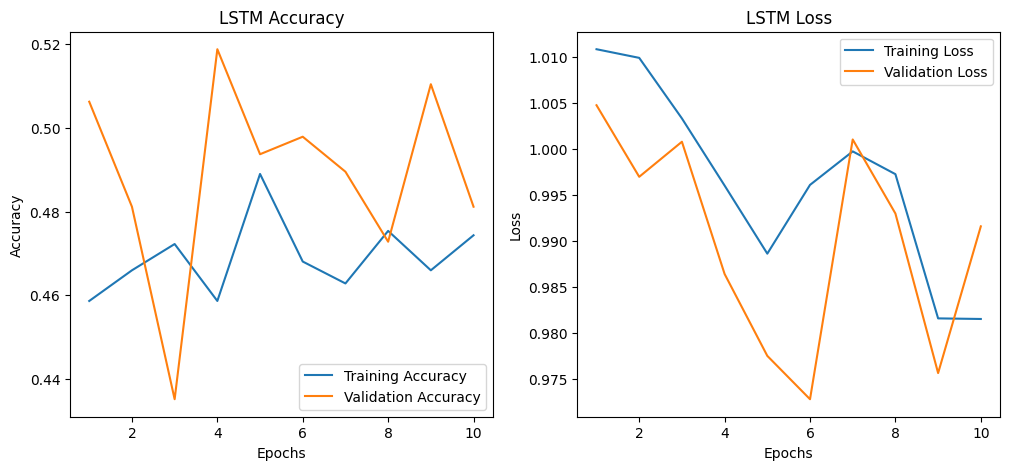

In [25]:
plot_history(lstm_history, "LSTM")


Evaluating ANN Model...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Classification Report for ANN:
              precision    recall  f1-score   support

    football       0.80      0.83      0.82        94
    politics       0.76      0.72      0.74        99
     science       0.75      0.77      0.76       106

    accuracy                           0.77       299
   macro avg       0.77      0.77      0.77       299
weighted avg       0.77      0.77      0.77       299



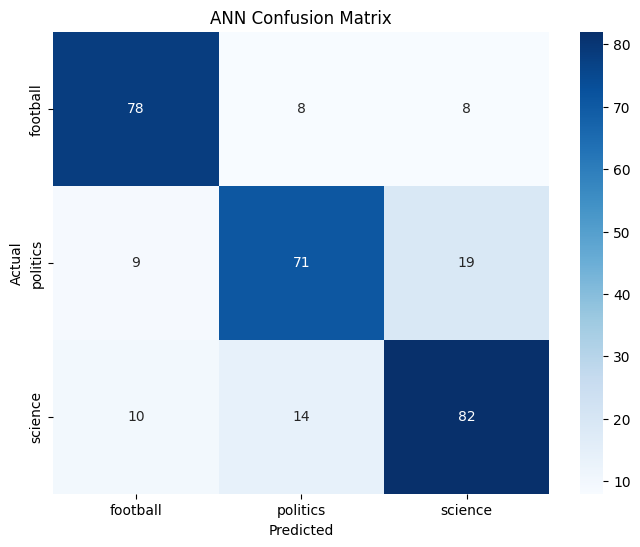


Evaluating CNN Model...
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step

Classification Report for CNN:
              precision    recall  f1-score   support

    football       0.79      0.82      0.81        94
    politics       0.73      0.62      0.67        99
     science       0.65      0.73      0.68       106

    accuracy                           0.72       299
   macro avg       0.73      0.72      0.72       299
weighted avg       0.72      0.72      0.72       299



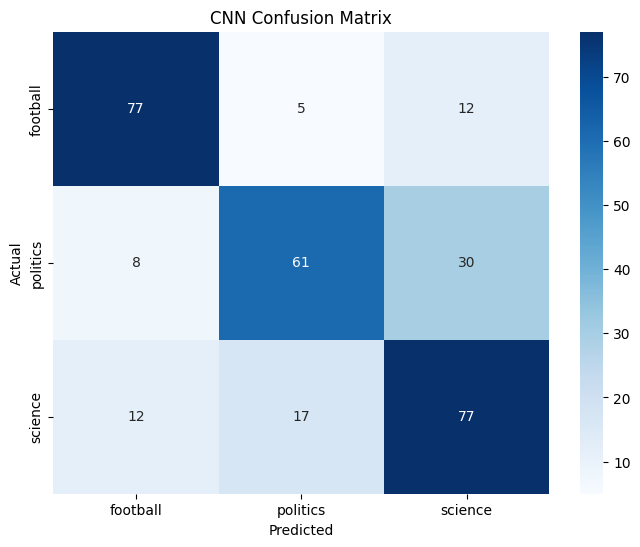


Evaluating LSTM Model...
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step

Classification Report for LSTM:
              precision    recall  f1-score   support

    football       0.49      0.47      0.48        94
    politics       0.49      0.44      0.47        99
     science       0.45      0.51      0.48       106

    accuracy                           0.47       299
   macro avg       0.48      0.47      0.47       299
weighted avg       0.48      0.47      0.47       299



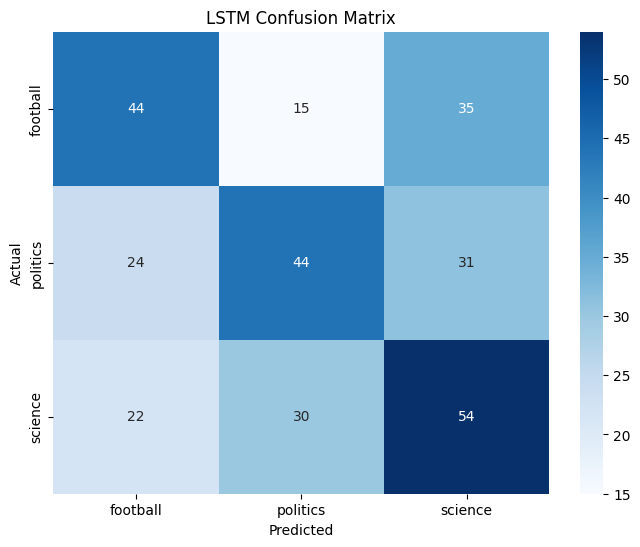

In [27]:
from sklearn.metrics import confusion_matrix

for model, name in zip([ann_model, cnn_model, lstm_model], ['ANN', 'CNN', 'LSTM']):
    print(f"\nEvaluating {name} Model...")
    if name == 'LSTM':
        y_pred = model.predict(X_test_lstm)
    else:
        y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

    plot_confusion_matrix(y_true, y_pred_classes, name, label_encoder.classes_)